In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import sklearn.model_selection
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#Read data from input files
inp_data = pd.read_excel("./Data/Airfoil.xlsx")
inp_data = inp_data[['Frequency','Angle','Chord_length','Velocity','thickness','Sound_level']]
inp_data.head()

,Frequency,Angle,Chord_length,Velocity,thickness,Sound_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
# Split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp_data.drop('Sound_level',axis=1), 
                                                    inp_data['Sound_level'], test_size=0.30, 
                                                    random_state=101)

In [4]:
inp_data.describe()

,Frequency,Angle,Chord_length,Velocity,thickness,Sound_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


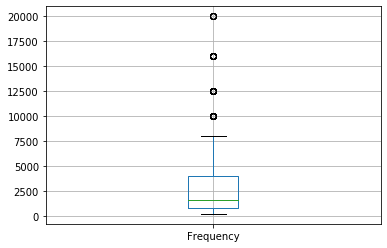

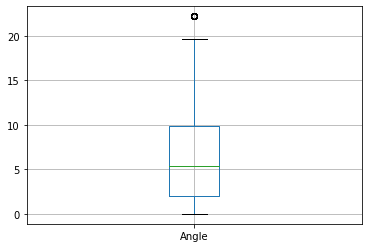

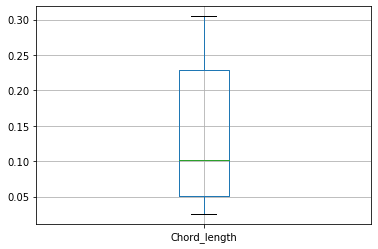

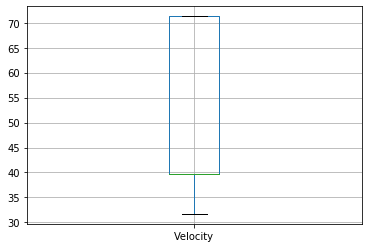

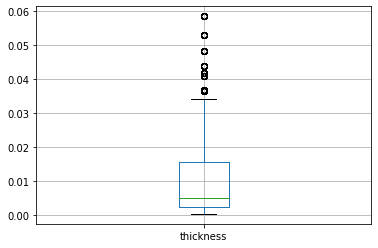

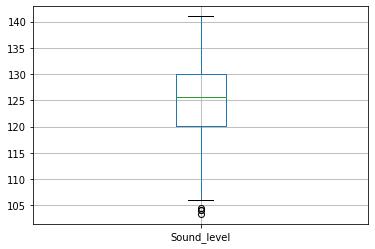

In [5]:
for column in inp_data:
    plt.figure()
    inp_data.boxplot([column])

In [6]:
X_train = sm.add_constant(X_train)
lnrmodel = sm.OLS(y_train,X_train)
results = lnrmodel.fit()

C:\Users\Vijay S Chauhan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Sound_level   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     209.7
Date:                Fri, 11 Sep 2020   Prob (F-statistic):          6.35e-155
Time:                        12:03:35   Log-Likelihood:                -3162.3
No. Observations:                1052   AIC:                             6337.
Df Residuals:                    1046   BIC:                             6366.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          132.9106      0.670    198.513   

In [8]:
from sklearn.metrics import mean_squared_error
X_test = sm.add_constant(X_test)
test_pred = results.predict(X_test)
#print('Predicted values for month ::\n',test_pred)
print('Actual values for month ::\n',y_test)
#print('RMSE test values = ', np.sqrt(mean_squared_error(test_pred,y_test)))

Actual values for month ::
 1051    129.776810
1286    129.579824
1272    130.806030
778     133.343746
1236    119.952124
           ...    
412     124.187951
1039    128.705325
1294    133.258198
485     130.082683
729     135.214221
Length: 451, dtype: float64
